In [1]:
import cPickle as pickle
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import os

In [3]:
import glob
import cPickle as pickle

In [4]:
import os, sys, time
import cPickle as pickle
sys.path.append('../EXP/')
import ClevelandMcGill as C
from util import Util
reload(C)

<module 'ClevelandMcGill' from '../EXP/ClevelandMcGill/__init__.pyc'>

In [5]:
RESULTS_DIR = '/n/regal/pfister_lab/PERCEPTION/RESULTS/'

In [6]:
for subdir, _, _ in os.walk(RESULTS_DIR+'/C.Figure3.data_to_piechart'):
#     print subdir
    if len(subdir.split('/')) == 9:
      if len(os.listdir(subdir)) != 24:
        print subdir, len(os.listdir(subdir)), os.listdir(subdir)
        
        classifier = subdir.split('/')[-1]
        dataset = subdir.split('/')[-2]
        experiment = subdir.split('/')[-3]
        
        print 'sbatch', experiment + '_' + dataset + '_' + classifier +'_True.sbatch'

In [7]:
for subdir, _, _ in os.walk(RESULTS_DIR+'C.Figure3.data_to_barchart'):
#     print subdir
    if len(subdir.split('/')) == 8:
      if len(os.listdir(subdir)) != 24:
        print subdir, len(os.listdir(subdir))
        
#         classifier = subdir.split('/')[-1]
#         dataset = subdir.split('/')[-2]
#         experiment = subdir.split('/')[-3]
        
#         print 'sbatch', experiment + '_' + dataset + '_' + classifier +'_True.sbatch'

In [57]:
len(bar_stats[4][0])

4

In [33]:
experiment = 'C.Figure3.data_to_piechart'
e_dir = os.path.join(RESULTS_DIR, experiment)
datasets = sorted(os.listdir(e_dir))

pie_stats = [None]*4

classifiers = ['MLP', 'LeNet', 'VGG19', 'XCEPTION']
for i,c in enumerate(classifiers):
    
    pie_stats[i] = []
    c_dir = os.path.join(e_dir, c)

    stats_files = glob.glob(c_dir+'/*_noise.p')
    stats_per_c = []
#     print stats_files

    for s in stats_files:
        
        with open(s, 'r') as f:
            stats = pickle.load(f)
        stats_per_c.append(stats)
#         print stats['time']

    pie_stats[i].append(stats_per_c)
            
        
#         print d, c, np.mean([stats1['MLAE'], stats2['MLAE']])

In [34]:
experiment = 'C.Figure3.data_to_piechart_aa'
e_dir = os.path.join(RESULTS_DIR, experiment)
datasets = sorted(os.listdir(e_dir))

pie_stats_aa = [None]*4

classifiers = ['MLP', 'LeNet', 'VGG19', 'XCEPTION']
for i,c in enumerate(classifiers):
    
    pie_stats_aa[i] = []
    c_dir = os.path.join(e_dir, c)

    stats_files = glob.glob(c_dir+'/*_noise.p')
    stats_per_c = []
#     print stats_files

    for s in stats_files:
        
        with open(s, 'r') as f:
            stats = pickle.load(f)
        stats_per_c.append(stats)
#         print stats['time']

    pie_stats_aa[i].append(stats_per_c)
            
        
#         print d, c, np.mean([stats1['MLAE'], stats2['MLAE']])

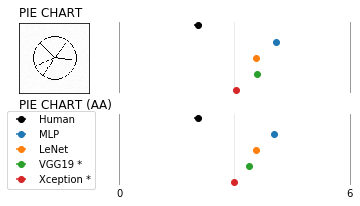

In [54]:
import numpy as np
import scipy as sp
import scipy.stats
from matplotlib import gridspec

all_data = []
images = []

titles = ['Pie Chart', 'Pie Chart (AA)']

#
# human values
#
human_values = [(2.05, 0.115),\
                (2.05, 0.115)]
human_values.append((np.mean([v[0] for v in human_values]), np.mean([v[1] for v in human_values])))



## data
no_samples = len(pie_stats[0][0])
bar_data = [None]*4
pie_data = [None]*4
classifiers = ['MLP', 'LeNet', 'VGG19 *', 'Xception *']
for i, c in enumerate(classifiers):

    bar_mlae_s = []
    pie_mlae_s = []
    
    for sample in range(len(pie_stats_aa[i][0])):

        # grab sample from both
        bar_mlae = pie_stats_aa[i][0][sample]['MLAE']
        pie_mlae = pie_stats[i][0][sample]['MLAE']
#         print i, sample, bar_mlae, pie_mlae
        bar_mlae_s.append(bar_mlae)
        pie_mlae_s.append(pie_mlae)
        
    bar_data[i] = bar_mlae_s
    pie_data[i] = pie_mlae_s
    
# # swap vgg19 and xception *
# pie_data[3], pie_data[4] = pie_data[4], pie_data[3]
# bar_data[3], bar_data[4] = bar_data[4], bar_data[3]

all_data = [pie_data, bar_data]

data_for_stats = []
labels_for_stats = []

## images
data, labels = C.Figure3.generate_datapoint()
bar_image = C.Figure3.data_to_barchart(data)
pie_image = C.Figure3.data_to_piechart(data)

bar_image = bar_image.astype(np.float32)
bar_image += np.random.uniform(0, 0.05,(100,100))

pie_image = pie_image.astype(np.float32)
pie_image += np.random.uniform(0, 0.05,(100,100))
images = [pie_image, bar_image]



fig = plt.figure(figsize=(6,3), facecolor='white')
gs = gridspec.GridSpec(2, 2, width_ratios=[.3,1], hspace=.3)

j = 0 # grid index (running)

rows = 2
for row in range(rows):
    
    for i, c in enumerate(['Image', 'Human']+classifiers):
        

        
        if i==0:
            # this is the image
            
            

            fig = plt.subplot(gs[j])
            j += 1
            
            plt.title(titles[row].upper(), loc='left')

            
            ax = plt.gca()
            from matplotlib.ticker import NullFormatter
            ax.xaxis.set_major_formatter(NullFormatter())
            ax.xaxis.set_ticks_position('none') 
            ax.yaxis.set_major_formatter(NullFormatter())
            ax.yaxis.set_ticks_position('none') 
            plt.tight_layout()

            ax.set_xticklabels('')
            ax.set_yticklabels('')
            if row==0:
                plt.imshow(images[row], cmap='Greys', interpolation='none')
            else:
                ax = plt.gca()
                ax.spines['top'].set_visible(False)
                ax.spines['right'].set_visible(False)
                ax.spines['bottom'].set_visible(False)
                ax.spines['left'].set_visible(False)
            
            continue

        #

#         if row == 0:
#             plt.title(c)

        if i==1:

            fig = plt.subplot(gs[j])
            j += 1
        
#             if row > 4:
#                 continue
        
            # this is human
            means = human_values[row][0]
            confidence = human_values[row][1]
            
            errorbars = plt.errorbar(means, 6-i, xerr=confidence, fmt='o',  color='black', label='Human')
            continue

        
        data = [all_data[row][i-2]]

        data_for_stats += data

#         if not data[0]:
#             print row, i
#             continue
#         print data
        # grab the MIDMEANS
        sorted_data = [sorted(r) for r in data]
#         print sorted_data
        quarter = len(sorted_data[0]) / 4 # always floor

        data = [r[quarter:-quarter] for r in sorted_data]
        
        means = [np.mean(r) for r in data]
        
        confidence = [1.96*np.std(r) for r in data]


        y_pos = 6-i#range(len(means))


        plt.xlim(0,6.1)

        ax = plt.gca()
        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)
        ax.spines['bottom'].set_visible(False)
        ax.spines['left'].set_visible(False)
#         if row != 0:
        ax.get_yaxis().set_ticks([])
#         else:
#     #             print labels
#             ax.get_yaxis().set_ticks(range(len(labels))) # we set the labels here
#             ax.get_yaxis().set_ticklabels(labels)

        ax.get_xaxis().set_ticks(np.arange(0,7,6)) # mark the tange
        ax.get_xaxis().set_ticks(np.arange(3,3.1), minor=True) # mark the center
        ax.tick_params(axis=u'both', which=u'both',length=0)
        
        # remove tick marks
        if row == 0:
            from matplotlib.ticker import NullFormatter
            ax.xaxis.set_major_formatter(NullFormatter())
            ax.xaxis.set_ticks_position('none')

        # grid lines for X
        plt.grid(True, color='gray', which='major', axis='x', alpha=1)
        plt.grid(True, color='gray', which='minor', axis='x', alpha=0.2)
        
        c_color = 'C'+str(i-2)
        
        
#         print i, c
#         if i == 4:
#             # vgg19 imagenet
# #             c = c+' *'
#             c_color = '#b2df8a'
#         elif i == 5:
#             # vgg from scratch
# #             c = c+'vg s'
#             c = 'VGG19'
#             c_color = 'C2'
#         elif i == 6:
#             # xcpetion imagenet
#             c = 'Xception *'
#             c_color = '#fb9a99'
#         elif i == 7:
#             # xception from scratch
# #             c = c+'x sc'
# #             c = 'Xception'
#             c_color = 'C3'

        errorbars = plt.errorbar(means, y_pos, xerr=confidence, fmt='o', label=c, color=c_color)
plt.legend(loc='center left', bbox_to_anchor=(-.5, 0.5))
plt.savefig('../PAPER/gfx/figure3_mlae_better_all_AA.pdf', bbox_inches='tight', pad_inches=0)

32

In [49]:
from pyvttbl import DataFrame
from scipy.stats import ttest_ind, ttest_ind_from_stats

In [59]:
df = DataFrame()

df['data'] = list(np.array(data_for_stats).ravel())
df['conditions'] = ['No AA']*16 + ['AA']*16

aov_pyvttbl = df.anova1way('data', 'conditions')
print aov_pyvttbl

Anova: Single Factor on data

SUMMARY
Groups   Count    Sum     Average   Variance 
AA          16   56.013     3.501      0.146 
No AA       16   57.271     3.579      0.145 

O'BRIEN TEST FOR HOMOGENEITY OF VARIANCE
Source of Variation      SS       df      MS           F       P-value     eta^2     Obs. power 
Treatments            5.096e-06    1   5.096e-06   2.165e-04     0.988   7.218e-06        0.050 
Error                     0.706   30       0.024                                                
Total                     0.706   31                                                            

ANOVA
Source of Variation    SS     df    MS       F     P-value   eta^2   Obs. power 
Treatments            0.049    1   0.049   0.341     0.564   0.011        0.089 
Error                 4.356   30   0.145                                        
Total                 4.406   31                                                

POSTHOC MULTIPLE COMPARISONS

Tukey HSD: Table of q-statistics

In [45]:
len(all_data[1])

4

In [43]:
pie_stats_aa[3][0]

[{'MLAE': 3.061893412904189,
  'loss': [0.084714925813674929,
   0.069296807761987045,
   0.06468774158954621,
   0.061495517130692803,
   0.059004841466744742,
   0.057050550818443298,
   0.055144489417473477,
   0.053890352076292038,
   0.052494589253266652,
   0.051388943046331403,
   0.050394958454370496,
   0.049371372960011164,
   0.048504485808809596,
   0.047727943050861359,
   0.046959541038672128,
   0.046199373320738472,
   0.045564819892247518,
   0.045061119899153707,
   0.044376025029023491,
   0.043852610911925632,
   0.043268499517440794,
   0.0428019802014033,
   0.042349366734425228,
   0.041912848969300587,
   0.041471130933364235,
   0.040992904267708463,
   0.040590203269322715,
   0.04021521297295888,
   0.039829684359828629,
   0.039472034099698065,
   0.039161901052792866,
   0.038849967391292255,
   0.038412281334400174,
   0.03811429273188114,
   0.037875510016083719,
   0.037510375615954397,
   0.03728575591345628,
   0.037045091706514356,
   0.03670273862878

In [38]:
all_data[1]

[[4.0110941427099327,
  4.0073724290440724,
  4.0707333504481529,
  4.0429431488586856],
 [3.5513774743669826,
  3.5365319287864239,
  3.6078261594661867,
  3.5688507349438554],
 [3.3548917923567356,
  3.3818775746269383,
  3.3929038135691849,
  3.4574729394512573],
 None,
 [3.061893412904189,
  3.0051740957983406,
  2.9945745936426258,
  2.9670174097055724],
 None]

In [67]:
len(bar_stats[4])

1

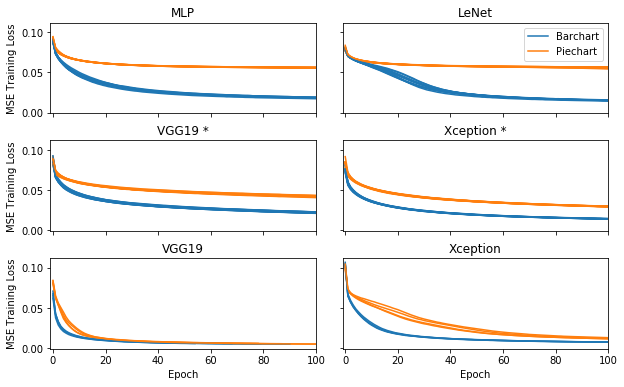

In [85]:
from matplotlib import gridspec


classifiers = ['MLP', 'LeNet', 'VGG19', 'XCEPTION', 'VGG19', 'XCEPTION']

fig = plt.figure(figsize=(10,6), facecolor='white')
gs = gridspec.GridSpec(3, 2, width_ratios=[1,1], hspace=.3, wspace=.1)

axes = [None]*6

for i, c in enumerate(classifiers):
    
    if i == 0:
        axes[i] = fig.add_subplot(gs[i])#, sharey=axes[0])
        plt.setp(axes[0].get_xticklabels(), visible=False)
        plt.ylabel('MSE Training Loss')        
    elif i == 1 or i==3:
        axes[i] = fig.add_subplot(gs[i], sharey=axes[0])
        plt.setp(axes[i].get_yticklabels(), visible=False)
        plt.setp(axes[i].get_xticklabels(), visible=False)      
        
#         plt.ylabel(False)
    elif i == 2 or i == 4:
        
        axes[i] = fig.add_subplot(gs[i], sharey=axes[0], sharex=axes[0])
        

        if i == 2:
            plt.setp(axes[i].get_xticklabels(), visible=False)  
        
        
        plt.ylabel('MSE Training Loss')
        if i!=2:
            plt.xlabel('Epoch')                
    elif i == 5:
        axes[i] = fig.add_subplot(gs[i], sharey=axes[2])
        plt.setp(axes[5].get_yticklabels(), visible=False)        
        plt.xlabel('Epoch')        

    for sample in range(len(bar_stats[i][0])):
        
        # grab sample from both
#         print i,#bar_stats[i]
        if len(bar_stats[i][0])>0:
            bar_loss = bar_stats[i][0][sample]['loss']
        else:
            bar_loss = [0]
        if len(pie_stats[i][0])>0:
            pie_loss = pie_stats[i][0][sample]['loss']
        else:
            pie_loss = [0]
        if sample == 0:
            # only label the first
            plot(bar_loss, label='Barchart', color='C0')
            plot(pie_loss, label='Piechart', color='C1')
        else:
            # but use the same colors for all
            plot(bar_loss, color='C0')
            plot(pie_loss, color='C1')
            
    plt.xlim(-1,100)
    
    if i == 2:
        c = 'VGG19 *'
    elif i == 3:
        c = 'Xception *'
    elif i == 5:
        c = 'Xception'
    
    plt.title(c)


    if i == 1:
        plt.legend()
        
plt.savefig('../PAPER/gfx/figure3_loss.pdf')

In [28]:
bar_stats[i]

[[]]

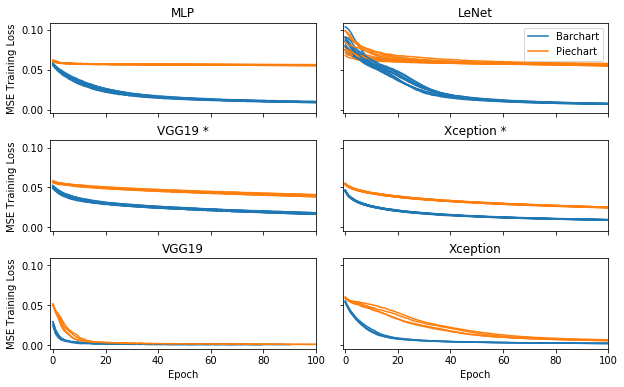

In [86]:
from matplotlib import gridspec


classifiers = ['MLP', 'LeNet', 'VGG19', 'XCEPTION', 'VGG19', 'XCEPTION']

fig = plt.figure(figsize=(10,6), facecolor='white')
gs = gridspec.GridSpec(3, 2, width_ratios=[1,1], hspace=.3, wspace=.1)

axes = [None]*6

for i, c in enumerate(classifiers):
    
    if i == 0:
        axes[i] = fig.add_subplot(gs[i])#, sharey=axes[0])
        plt.setp(axes[0].get_xticklabels(), visible=False)
        plt.ylabel('MSE Training Loss')        
    elif i == 1 or i==3:
        axes[i] = fig.add_subplot(gs[i], sharey=axes[0])
        plt.setp(axes[i].get_yticklabels(), visible=False)
        plt.setp(axes[i].get_xticklabels(), visible=False)      
        
#         plt.ylabel(False)
    elif i == 2 or i == 4:
        
        axes[i] = fig.add_subplot(gs[i], sharey=axes[0], sharex=axes[0])
        

        if i == 2:
            plt.setp(axes[i].get_xticklabels(), visible=False)  
        
        
        plt.ylabel('MSE Training Loss')
        if i!=2:
            plt.xlabel('Epoch')                
    elif i == 5:
        axes[i] = fig.add_subplot(gs[i], sharey=axes[2])
        plt.setp(axes[5].get_yticklabels(), visible=False)        
        plt.xlabel('Epoch')        

    for sample in range(len(bar_stats[i][0])):
        
        # grab sample from both
#         print i,#bar_stats[i]
        if len(bar_stats[i][0])>0:
            bar_loss = bar_stats[i][0][sample]['val_loss']
        else:
            bar_loss = [0]
        if len(pie_stats[i][0])>0:
            pie_loss = pie_stats[i][0][sample]['val_loss']
        else:
            pie_loss = [0]
        if sample == 0:
            # only label the first
            plot(bar_loss, label='Barchart', color='C0')
            plot(pie_loss, label='Piechart', color='C1')
        else:
            # but use the same colors for all
            plot(bar_loss, color='C0')
            plot(pie_loss, color='C1')
            
    plt.xlim(-1,100)
    
    if i == 2:
        c = 'VGG19 *'
    elif i == 3:
        c = 'Xception *'
    elif i == 5:
        c = 'Xception'
    
    plt.title(c)


    if i == 1:
        plt.legend()
        
plt.savefig('../PAPER/gfx/figure3_val_loss.pdf')

In [112]:
len(bar_stats[0][0])

8

In [113]:
bar_stats[0][0][0]['MLAE']

2.4947385390539498

2 MLP
3 LeNet
4 VGG19 *
5 Xception *
6 VGG19
7 Xception
2 MLP
3 LeNet
4 VGG19 *
5 Xception *
6 VGG19
7 Xception


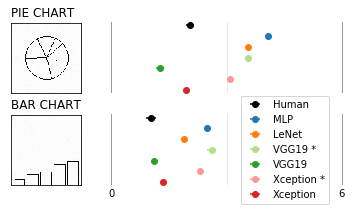

In [99]:
import numpy as np
import scipy as sp
import scipy.stats
from matplotlib import gridspec

all_data = []
images = []

titles = ['Pie Chart', 'Bar Chart']

#
# human values
#
human_values = [(2.05, 0.115),\
                (1.035, 0.125)]
human_values.append((np.mean([v[0] for v in human_values]), np.mean([v[1] for v in human_values])))



## data
no_samples = len(bar_stats[0][0])
bar_data = [None]*6
pie_data = [None]*6
classifiers = ['MLP', 'LeNet', 'VGG19 *', 'Xception *', 'VGG19', 'Xception']
for i, c in enumerate(classifiers):

    bar_mlae_s = []
    pie_mlae_s = []
    
    for sample in range(len(bar_stats[i][0])):

        # grab sample from both
        bar_mlae = bar_stats[i][0][sample]['MLAE']
        pie_mlae = pie_stats[i][0][sample]['MLAE']
#         print i, sample, bar_mlae, pie_mlae
        bar_mlae_s.append(bar_mlae)
        pie_mlae_s.append(pie_mlae)
        
    bar_data[i] = bar_mlae_s
    pie_data[i] = pie_mlae_s
    
# swap vgg19 and xception *
pie_data[3], pie_data[4] = pie_data[4], pie_data[3]
bar_data[3], bar_data[4] = bar_data[4], bar_data[3]

all_data = [pie_data, bar_data]

## images
data, labels = C.Figure3.generate_datapoint()
bar_image = C.Figure3.data_to_barchart(data)
pie_image = C.Figure3.data_to_piechart(data)

bar_image = bar_image.astype(np.float32)
bar_image += np.random.uniform(0, 0.05,(100,100))

pie_image = pie_image.astype(np.float32)
pie_image += np.random.uniform(0, 0.05,(100,100))
images = [pie_image, bar_image]



fig = plt.figure(figsize=(6,3), facecolor='white')
gs = gridspec.GridSpec(2, 2, width_ratios=[.3,1], hspace=.3)

j = 0 # grid index (running)

rows = 2
for row in range(rows):
    
    for i, c in enumerate(['Image', 'Human']+classifiers):
        

        
        if i==0:
            # this is the image

            fig = plt.subplot(gs[j])
            j += 1
            
            plt.title(titles[row].upper(), loc='left')

            
            ax = plt.gca()
            from matplotlib.ticker import NullFormatter
            ax.xaxis.set_major_formatter(NullFormatter())
            ax.xaxis.set_ticks_position('none') 
            ax.yaxis.set_major_formatter(NullFormatter())
            ax.yaxis.set_ticks_position('none') 
            plt.tight_layout()

            ax.set_xticklabels('')
            ax.set_yticklabels('')
            
            plt.imshow(images[row], cmap='Greys', interpolation='none')
            
            continue

        #

#         if row == 0:
#             plt.title(c)

        if i==1:

            fig = plt.subplot(gs[j])
            j += 1
        
#             if row > 4:
#                 continue
        
            # this is human
            means = human_values[row][0]
            confidence = human_values[row][1]
            
            errorbars = plt.errorbar(means, 6-i, xerr=confidence, fmt='o',  color='black', label='Human')
            continue

    
        data = [all_data[row][i-2]]
#         print data
        # grab the MIDMEANS
        sorted_data = [sorted(r) for r in data]
#         print sorted_data
        quarter = len(sorted_data[0]) / 4 # always floor

        data = [r[quarter:-quarter] for r in sorted_data]
        
        means = [np.mean(r) for r in data]
        
        confidence = [1.96*np.std(r) for r in data]


        y_pos = 6-i#range(len(means))


        plt.xlim(0,6.1)

        ax = plt.gca()
        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)
        ax.spines['bottom'].set_visible(False)
        ax.spines['left'].set_visible(False)
#         if row != 0:
        ax.get_yaxis().set_ticks([])
#         else:
#     #             print labels
#             ax.get_yaxis().set_ticks(range(len(labels))) # we set the labels here
#             ax.get_yaxis().set_ticklabels(labels)

        ax.get_xaxis().set_ticks(np.arange(0,7,6)) # mark the tange
        ax.get_xaxis().set_ticks(np.arange(3,3.1), minor=True) # mark the center
        ax.tick_params(axis=u'both', which=u'both',length=0)
        
        # remove tick marks
        if row == 0:
            from matplotlib.ticker import NullFormatter
            ax.xaxis.set_major_formatter(NullFormatter())
            ax.xaxis.set_ticks_position('none')

        # grid lines for X
        plt.grid(True, color='gray', which='major', axis='x', alpha=1)
        plt.grid(True, color='gray', which='minor', axis='x', alpha=0.2)
        
        c_color = 'C'+str(i-2)
        print i, c
        if i == 4:
            # vgg19 imagenet
#             c = c+' *'
            c_color = '#b2df8a'
        elif i == 5:
            # vgg from scratch
#             c = c+'vg s'
            c = 'VGG19'
            c_color = 'C2'
        elif i == 6:
            # xcpetion imagenet
            c = 'Xception *'
            c_color = '#fb9a99'
        elif i == 7:
            # xception from scratch
#             c = c+'x sc'
#             c = 'Xception'
            c_color = 'C3'

        errorbars = plt.errorbar(means, y_pos, xerr=confidence, fmt='o', label=c, color=c_color)
plt.legend(loc='right', bbox_to_anchor=(0.95, 0.5))
plt.savefig('../PAPER/gfx/figure3_mlae_better_all.pdf', bbox_inches='tight', pad_inches=0)